<a href="https://colab.research.google.com/github/MasBarr/Barrett2024/blob/main/BarrettFig3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.0 MB/s eta 0:00:00


Excel file loaded successfully from GitHub!
Data from the sheet loaded successfully.
T-test    0.90155
Name: p-val, dtype: float64
T-test    0.000071
Name: p-val, dtype: float64


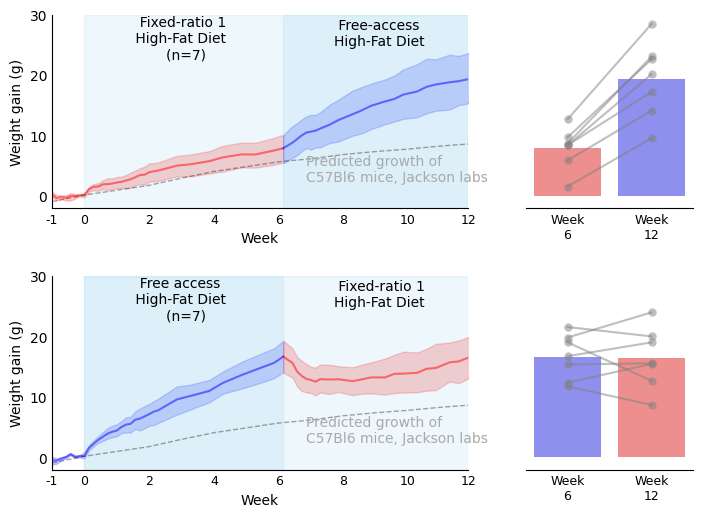

16.677410714285713
16.494553571428572
7.938928571428572
19.36035714285714


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from io import BytesIO

def load_excel_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the Excel file
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Load the Excel data directly from the response content
        sheets = pd.read_excel(BytesIO(file_response.content), sheet_name=None)
        print("Excel file loaded successfully from GitHub!")
        return sheets
    else:
        print(f"Failed to download the file: {file_response.status_code}")
        return None

# GitHub details
username = "MasBarr"  # Replace with the actual GitHub username or organization
repo = "Barrett2024"  # Repository name
branch = "main"       # Branch name
folder = "Data/Fig3"  # Folder path within the repository
file_name = "TumbleWeights_w3 (3).xlsx"  # Excel file name

# Load the Excel file
Sheet = load_excel_from_github(username, repo, branch, folder, file_name)

# Ensure that sheets is not None before proceeding
if df is not None:
    # Access the sheet you need, or use the specific sheet name if applicable
    df = Sheet['Sheet1']  # or use `sheets[sheet_name]` if the sheet name differs
    print("Data from the sheet loaded successfully.")
else:
    print("Data loading failed. Check the GitHub URL or repository structure.")


# Define font sizes
font_sizes = {
    'title': 10,
    'xlabel': 10,
    'ylabel': 10,
    'xticks': 9,
    'yticks': 9,
    'legend': 8,
    'inset_title': 9,
    'inset_ylabel': 9,
    'anova_text': 9  # Font size for ANOVA text
}

# Ensure that matplotlib uses DejaVu Sans font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert figure size from mm to inches
fig_width_in = 210 / 25.4  # Split the total width between the two figures
fig_height_in = 150 / 25.4


# Add variable "WeightChange" based on a defined baseline period
relevant_days = df[(df['Day'] >= -7) & (df['Day'] <= 0)]
swap_day = df[(df['Day'] == 43)]

# Calculate the average weight for these days for each MouseID
average_weights = relevant_days.groupby('MouseID')['Weight'].mean().reset_index()
average_weights.rename(columns={'Weight': 'AverageWeight'}, inplace=True)

swap_weights = swap_day.groupby('MouseID')['Weight'].mean().reset_index()
swap_weights.rename(columns={'Weight': 'SwapWeight'}, inplace=True)

# Merge this average weight back to the original dataframe
data_merged = df.merge(average_weights, on='MouseID', how='left')
data_merged = data_merged.merge(swap_weights, on='MouseID', how='left')

# Calculate the WeightChange column
df['WeightChange'] = (data_merged['Weight'] - data_merged['AverageWeight'])
df['SwapChange'] = data_merged['Weight'] - data_merged['SwapWeight']

ybottom = -2
ytop = 30

# Set day to test for t-test
start_day = -7
day_to_test = 83

variable_to_test = "WeightChange"
swap_variable_to_test = "WeightChange"

# Convert 'Day' column to numeric, coercing errors to NaN
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

# Drop NaN values in 'Day' column
df = df.dropna(subset=['Day'])

# Convert 'Day' column to integers
df.loc[:, 'Day'] = df['Day'].astype(int)

# Drop cohort 1
df = df[df["Cohort"] != 1]

# Adjust subplot configuration to 2 rows and 2 columns
fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[5, 2], wspace=0.2)
gs.update(hspace=0.35)  # Adjust the value to increase/decrease the space between rows

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[0, 1])

line_palette_free_access = ['blue' if day <= 42 else 'red' for day in df[df['Group'] == 'Free access']['Day']]
line_palette_fixed_ratio_1 = ['red' if day <= 42 else 'blue' for day in df[df['Group'] == 'Fixed-ratio 1']['Day']]

# Apply the custom palette function to the line plots
# Plot the first 6 weeks (Days <= 42) in one color
sns.lineplot(
    data=df[(df["Group"] == "Free access") & (df['Day'] <= 43)],
    x='Day',
    y=variable_to_test,
    color='blue',
    alpha=0.5,
    ax=ax1
)
sns.lineplot(
    data=df[(df["Group"] == "Fixed-ratio 1") & (df['Day'] <= 43)],
    x='Day',
    y=variable_to_test,
    color='red',
    alpha=0.5,
    ax=ax2
)

# Plot the remaining weeks (Days > 42) in another color
sns.lineplot(
    data=df[(df["Group"] == "Free access") & (df['Day'] > 41)],
    x='Day',
    y=variable_to_test,
    color='red',
    alpha=0.5,
    ax=ax1
)
sns.lineplot(
    data=df[(df["Group"] == "Fixed-ratio 1") & (df['Day'] > 41)],
    x='Day',
    y=variable_to_test,
    color='blue',
    alpha=0.5,
    ax=ax2
)


# JAX Data
df_jax = pd.DataFrame()
df_jax["week"] = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
df_jax["weight"] = [25, 26.1, 26.9, 27.7, 28.9, 30, 30.8, 31.6, 32.1, 32.8, 33.3, 33.7, 34.2, 34.6, 35.1, 35.8, 36.3]

# Transformations to align to Mason data
df_jax["day"] = (df_jax["week"] * 7) - 63
df_jax["weight_gain"] = (df_jax["weight"] - df_jax["weight"][1] + 0.2)

# Add Jax plot
sns.lineplot(data=df_jax, x='day', y="weight_gain", color="k", ax=ax1, linestyle="--", alpha=0.35, lw=1)
ax1.text(48, ybottom + 4.5, "Predicted growth of \nC57Bl6 mice, Jackson labs", fontsize=font_sizes['title'], color="darkgray")
sns.lineplot(data=df_jax, x='day', y="weight_gain", color="k", ax=ax2, linestyle="--", alpha=0.35, lw=1)
ax2.text(48, ybottom + 4.5, "Predicted growth of \nC57Bl6 mice, Jackson labs", fontsize=font_sizes['title'], color="darkgray")

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Set y ticks
yticks = np.arange(-50, 100, 5)

# Define custom tick positions and corresponding week labels
custom_ticks = [-7, 0, 14, 28, 42, 56, 70, 83]  # Days corresponding to weeks
custom_labels = ['-1', '0', '2', '4', '6', '8', '10', '12']  # Weeks

# Set x-ticks and labels manually
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels, fontsize=font_sizes['xticks'])  # Custom week labels
ax1.tick_params(axis='x', which='major', length=10, color="k", width=2, direction='inout')

ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels, fontsize=font_sizes['xticks'])  # Custom week labels
ax2.tick_params(axis='x', which='major', length=10, color="k", width=2, direction='inout')

# Set x-limits to ensure the full range of days is shown
ax1.set_xlim(custom_ticks[0], custom_ticks[-1])
ax2.set_xlim(custom_ticks[0], custom_ticks[-1])

# Add transparent box
ax1.axvspan(0, 83, color='skyblue', alpha=0.15)
ax2.axvspan(0, 83, color='skyblue', alpha=0.15)
ax1.axvspan(0, 43, color='skyblue', alpha=0.15)
ax2.axvspan(43, 83, color='skyblue', alpha=0.15)

# Adding labels and title
ax1.set_xlabel('Week', fontsize=font_sizes['xlabel'])
ax1.set_ylabel("Weight gain (g)", fontsize=font_sizes['ylabel'])
ax2.set_xlabel('Week', fontsize=font_sizes['xlabel'])
ax2.set_ylabel("Weight gain (g)", fontsize=font_sizes['ylabel'])

# Limit axes
yaxis_max = int(round(df.loc[df['Day'] == day_to_test, variable_to_test].max()) + 1)
#ax1.set_xlim(start_day, day_to_test)
ax1.set_ylim(ybottom, ytop)
#ax2.set_xlim(start_day, day_to_test)
ax2.set_ylim(ybottom, ytop)

# Remove legends
ax1.legend([], [])
ax2.legend([], [])

# Add text annotations
ax1.text(10, ytop - 7.2, '  Free access\n High-Fat Diet \n        (n=7)', fontsize=font_sizes['title'])
ax1.text(54, ytop - 5, ' Fixed-ratio 1\nHigh-Fat Diet', fontsize=font_sizes['title'])
ax2.text(10, ytop - 7.2, '  Fixed-ratio 1\n High-Fat Diet \n        (n=7)', fontsize=font_sizes['title'])
ax2.text(54, ytop - 5, ' Free-access\nHigh-Fat Diet', fontsize=font_sizes['title'])

############# BAR GRAPHS

start_weight_change = df.loc[(df['Day'] == 43) &
                             (df['Group'] == "Free access" ) &
                             (df['Cohort'] != 1),
                             [swap_variable_to_test, 'MouseID', 'Day']]
final_weight_change = df.loc[(df['Day'] == 83) &
                             (df['Group'] == "Free access"),
                             [swap_variable_to_test, 'MouseID', 'Day']]

df_FR1_weightloss = pd.concat ([start_weight_change, final_weight_change])

# Update bar plot palette
sns.barplot(x=df_FR1_weightloss["Day"], y=df_FR1_weightloss["WeightChange"], ax=ax3, hue=df_FR1_weightloss["Day"], palette=["blue", "red"], errorbar=None, alpha=0.5, legend=False)
sns.stripplot(x=df_FR1_weightloss ["Day"], y=df_FR1_weightloss["WeightChange"], ax=ax3, s=6, color="gray", alpha=0.5, jitter=0)

# Connecting lines
day_43 = df_FR1_weightloss[df_FR1_weightloss['Day'] == 43].set_index('MouseID')
day_83 = df_FR1_weightloss[df_FR1_weightloss['Day'] == 83].set_index('MouseID')

for mouse_id in day_43.index:
    if mouse_id in day_83.index:
        ax3.plot([0, 1], [day_43.loc[mouse_id, 'WeightChange'], day_83.loc[mouse_id, 'WeightChange']], 'gray', linestyle='-', alpha=0.5)

ax3.set_xlabel('', fontsize=font_sizes['xlabel'])  # Adjust as needed
ax3.set_ylabel('', fontsize=font_sizes['ylabel'])  # Adjust as needed
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='x')
ax3.set_xticks([0, 1])
ax3.set_xticklabels(["Week\n6", "Week\n12"], fontsize=font_sizes['xticks'])
ax3.set_yticks([])
ax3.set_ylim(ybottom, ytop)
ax3.spines['left'].set_visible(False)

# Separate data for each group
group1_data = df_FR1_weightloss[df_FR1_weightloss['Day'] == 43][swap_variable_to_test]
group2_data = df_FR1_weightloss[df_FR1_weightloss['Day'] == 83][swap_variable_to_test]

# Perform paired t-test
t_test_result = pg.ttest(group1_data, group2_data, paired=True)

# Print the t-test result
print(t_test_result["p-val"])

start_weight_change2 = df.loc[(df['Day'] == 43) &
                             (df['Group'] == "Fixed-ratio 1" ) &
                             (df['Cohort'] != 1),
                             [swap_variable_to_test, 'MouseID', 'Day']]
final_weight_change2 = df.loc[(df['Day'] == 83) &
                             (df['Group'] == "Fixed-ratio 1"),
                             [swap_variable_to_test, 'MouseID', 'Day']]

df_FR1_weightloss = pd.concat ([start_weight_change2, final_weight_change2])

# Update bar plot palette
sns.barplot(x=df_FR1_weightloss["Day"], y=df_FR1_weightloss["WeightChange"], ax=ax4, hue=df_FR1_weightloss["Day"], palette=["red", "blue"], errorbar=None, alpha=0.5, legend=False)
sns.stripplot(x=df_FR1_weightloss ["Day"], y=df_FR1_weightloss["WeightChange"], ax=ax4, s=6, color="gray", alpha=0.5, jitter=0)

# Connecting lines
day_43 = df_FR1_weightloss[df_FR1_weightloss['Day'] == 43].set_index('MouseID')
day_83 = df_FR1_weightloss[df_FR1_weightloss['Day'] == 83].set_index('MouseID')

for mouse_id in day_43.index:
    if mouse_id in day_83.index:
        ax4.plot([0, 1], [day_43.loc[mouse_id, 'WeightChange'], day_83.loc[mouse_id, 'WeightChange']], 'gray', linestyle='-', alpha=0.5)

ax4.set_xlabel('', fontsize=font_sizes['xlabel'])  # Adjust as needed
ax4.set_ylabel('', fontsize=font_sizes['ylabel'])  # Adjust as needed
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(axis='x')
ax4.set_xticks([0, 1])
ax4.set_xticklabels(["Week\n6", "Week\n12"], fontsize=font_sizes['xticks'])
ax4.set_yticks([])
ax4.set_ylim(ybottom, ytop)
ax4.spines['left'].set_visible(False)
ax1.get_legend().remove()
ax2.get_legend().remove()

# Remove tick marks but keep the labels
ax1.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax1.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
ax2.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax2.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
ax3.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax3.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
ax4.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax4.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks

# Separate data for each group
group1_data = df_FR1_weightloss[df_FR1_weightloss['Day'] == 43][swap_variable_to_test]
group2_data = df_FR1_weightloss[df_FR1_weightloss['Day'] == 83][swap_variable_to_test]

# Perform paired t-test
t_test_result = pg.ttest(group1_data, group2_data, paired=True)

# Print the t-test result
print(t_test_result["p-val"])

# Plot and save fig
plt.savefig("Fig.5CDEF.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()


Free_Start = start_weight_change["WeightChange"].mean()
FR1_Finish = final_weight_change["WeightChange"].mean()

print(Free_Start)
print(FR1_Finish)

FR1_Start = start_weight_change2["WeightChange"].mean()
Free_Finish = final_weight_change2["WeightChange"].mean()

print(FR1_Start)
print(Free_Finish)